In [1]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

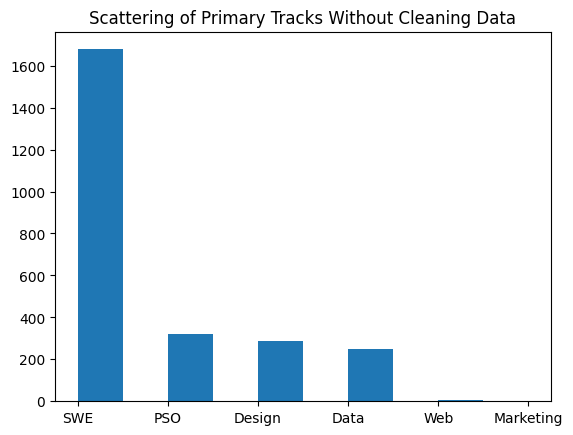

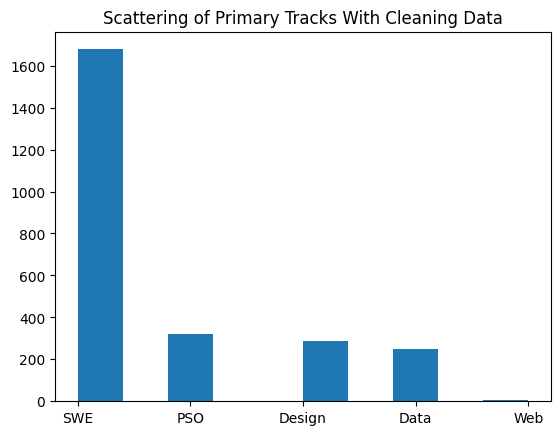

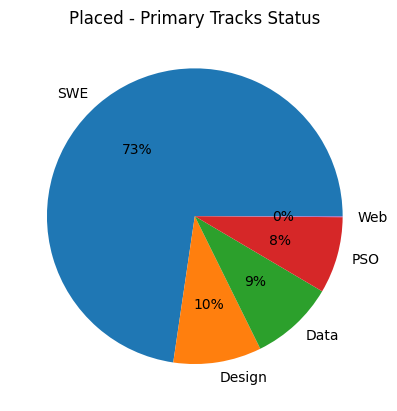

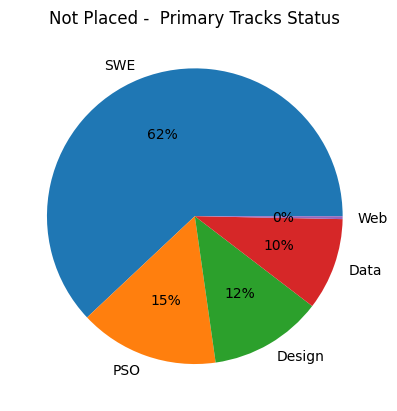

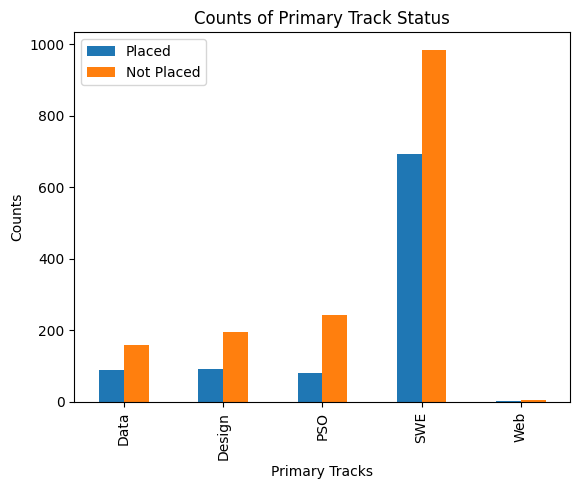

In [6]:
"""
Load data into DataFrame, clean and analyze primary tracks 
for placed and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'primary_track'.
     - Plot histogram to visualize distribution of primary tracks without cleaning the data using matplotlib:
       - Title: 'Scattering of Primary Tracks Without Cleaning Data'
   - Replace 'Marketing' with NaN in 'primary_track' column and drop corresponding rows with missing values.
     Plot histogram again to visualize distribution of primary tracks after cleaning the data using matplotlib:
       - Title: 'Scattering of Primary Tracks With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() function to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'primary_track' for placed and not placed candidates.
6. Plot pie chart for primary tracks of placed candidates using matplotlib:
   - Title: 'Placed - Primary Tracks Status'
7. Plot pie chart for primary tracks of not placed candidates using matplotlib:
   - Title: 'Not Placed - Primary Tracks Status'

8. Count occurrences of each primary track for both placed and not placed candidates.
9. Create combined DataFrame 'combinedDataFrame' and plot bar chart to visualize counts of primary tracks for both groups using matplotlib:
   - X-axis: 'Primary Tracks'
   - Y-axis: 'Counts'
   - Title: 'Counts of Primary Track Status'

Note: Requires matplotlib and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "primary_track"
dataFrame = dataFrame.dropna(subset=["primary_track"])
# Plot histogram to visualize distribution of primary tracks without cleaning the data
plt.title('Scattering of Primary Tracks Without Cleaning Data')
plt.hist(dataFrame["primary_track"])
plt.show()

# Replace "Marketing" with NaN and drop corresponding rows
dataFrame["primary_track"] = dataFrame["primary_track"].replace("Marketing", np.nan)
dataFrame = dataFrame.dropna(subset=["primary_track"])
# Plot histogram to visualize distribution of primary tracks after cleaning the data
plt.title('Scattering of Primary Tracks With Cleaning Data')
plt.hist(dataFrame["primary_track"])
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract primary tracks for placed and not placed groups
primaryTrackPlaced = dataPlaced["primary_track"]
primaryTrackNotPlaced = dataNotPlaced["primary_track"]

# Plot pie chart for primary tracks of placed candidates
primaryTrackPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Primary Tracks Status')
plt.show()

# Plot pie chart for primary tracks of not placed candidates
primaryTrackNotPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Primary Tracks Status')
plt.ylabel('')
plt.show()

# Count occurrences of each primary track
primaryTrackPlaced = primaryTrackPlaced.value_counts()
primaryTrackNotPlaced = primaryTrackNotPlaced.value_counts()

# Create a combined DataFrame for bar chart visualization
combinedDataFrame = pd.DataFrame({
    'Placed': primaryTrackPlaced,
    'Not Placed': primaryTrackNotPlaced
})

# Plot bar chart showing counts of primary tracks for both groups
combinedDataFrame.plot(kind='bar')
plt.xlabel('Primary Tracks')
plt.ylabel('Counts')
plt.title('Counts of Primary Track Status')
plt.show()
